In [ ]:
import pandas as pd

# 데이터 읽기 (파일명과 구분자에 맞게 수정)
df1 = pd.read_csv('icn.csv', sep='\t')  # tap으로 분리돼서 sep='\t'로 변경
df2 = pd.read_csv('hws.csv', sep='\t')
df3 = pd.read_csv('kum.csv', sep='\t')
df4 = pd.read_csv('ygs.csv', sep='\t')


# 1. DB 칼럼 확인

In [ ]:
## 칼럼 확인
df1.columns.tolist()
# 모든 값을 문자열로 변환
#serial_str = df['product_serial'].astype(str)

# 2. epc_lot별로 묶어서 보기

In [ ]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

a = 'epc_product'
b = 'epc_lot'

location_combinations = df[[a, b, 'epc_serial']].drop_duplicates()


# 인덱스를 1부터 시작하도록 재설정
unique_combinations = location_combinations.reset_index(drop=True)
unique_combinations.index += 1  # 인덱스를 1부터 시작


# epc_lot 별로 DB 묶어서 보기
filtered = unique_combinations[unique_combinations['epc_lot'] == 10021]

# 고유 값 목록을 DataFrame으로 변환
filtered

,epc_product,epc_lot,epc_serial
38002,3842332,10021,38002
38003,3842332,10021,38003
38004,3842332,10021,38004
38005,3842332,10021,38005
38006,3842332,10021,38006
...,...,...,...
39997,3842332,10021,39997
39998,3842332,10021,39998
39999,3842332,10021,39999
40000,3842332,10021,40000


# 3. EPC 코드 기준으로 조회했을 때 DB 형태

In [3]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

col = ['scan_location', 
'location_id',
'hub_type',
'business_step',
'event_type',
'operator_id',
'device_id',
'epc_code',
'epc_header',
'epc_company',
'epc_product',
'epc_lot',
'epc_manufacture',
'epc_serial',
'product_name',
'event_time',
'manufacture_date',
'expiry_date']

# epc_code로 검색했을 때,
c = col[7]
result = df[df[c] == "001.8804823.1293291.010004.20250701.000004158"].drop(columns=['epc_header', 'expiry_date', 'operator_id', 'device_id',], errors='ignore')

# 인덱스 1부터
result = result.reset_index(drop=True)
result.index += 1


# 출력
result

,scan_location,location_id,hub_type,business_step,event_type,epc_code,epc_company,epc_product,epc_lot,epc_manufacture,epc_serial,product_name,event_time,manufacture_date
1,인천공장,1,ICN_Factory,Factory,Aggregation,001.8804823.1293291.010004.20250701.000004158,8804823,1293291,10004,20250701,4158,Product 4,2025-07-01 10:34:41,2025-07-01 10:34:41
2,인천공장창고,5,ICN_WMS_Inbound,WMS,WMS_Inbound,001.8804823.1293291.010004.20250701.000004158,8804823,1293291,10004,20250701,4158,Product 4,2025-07-01 11:02:38,2025-07-01 10:34:41
3,인천공장창고,5,ICN_WMS_Outbound,WMS,WMS_Outbound,001.8804823.1293291.010004.20250701.000004158,8804823,1293291,10004,20250701,4158,Product 4,2025-07-29 16:57:38,2025-07-01 10:34:41
4,수도권물류센터,13,SEL_Logi_HUB_Inbound,Logistics_HUB,HUB_Inbound,001.8804823.1293291.010004.20250701.000004158,8804823,1293291,10004,20250701,4158,Product 4,2025-07-30 02:09:38,2025-07-01 10:34:41
5,수도권물류센터,13,SEL_Logi_HUB_Outbound,Logistics_HUB,HUB_Outbound,001.8804823.1293291.010004.20250701.000004158,8804823,1293291,10004,20250701,4158,Product 4,2025-08-14 13:20:38,2025-07-01 10:34:41
6,수도권_도매상1,23,SEL_WS1_Stock_Inbound,W_Stock_Inbound,W_Stock_Inbound,001.8804823.1293291.010004.20250701.000004158,8804823,1293291,10004,20250701,4158,Product 4,2025-08-14 23:06:38,2025-07-01 10:34:41
7,수도권_도매상1,23,SEL_WS1_Stock_Outbound,W_Stock_Outbound,W_Stock_Outbound,001.8804823.1293291.010004.20250701.000004158,8804823,1293291,10004,20250701,4158,Product 4,2025-09-17 21:38:38,2025-07-01 10:34:41
8,수도권_도매상3_권역_소매상2,74,SEL_WS3_Rsell2_Stock_Inbound,R_Stock_Inbound,R_Stock_Inbound,001.8804823.1293291.010004.20250701.000004158,8804823,1293291,10004,20250701,4158,Product 4,2025-09-18 01:20:38,2025-07-01 10:34:41
9,수도권_도매상3_권역_소매상2,74,SEL_WS3_Rsell2_Stock_Outbound,R_Stock_Outbound,R_Stock_Outbound,001.8804823.1293291.010004.20250701.000004158,8804823,1293291,10004,20250701,4158,Product 4,2025-10-06 19:23:38,2025-07-01 10:34:41
10,수도권_도매상3_권역_소매상2,74,SEL_WS3_Rsell2_POS_Sell,POS_Sell,POS_Sell,001.8804823.1293291.010004.20250701.000004158,8804823,1293291,10004,20250701,4158,Product 4,2025-10-30 18:51:38,2025-07-01 10:34:41


# 4. DB의 고유값 목록 Excel 저장

In [ ]:
# 파일 경로와 별칭 리스트
files = [
    ('ygs.csv', "YGS"),
    ("kum.csv", "KUM"),
    ("hws.csv", "HWS"),
    ("icn.csv", "ICN"),
]


large_cardinality_columns = ["epc_code", "epc_serial"]
large_cardinality_threshold = 1000

# 1. 각 컬럼별 고유값 집합 만들기
col_uniques = {}
for path, _ in files:
    df = pd.read_csv(path, sep="\t")
    for col in df.columns:
        if col not in col_uniques:
            col_uniques[col] = set()
        # 값 앞뒤 공백까지 모두 제거
        vals = df[col].astype(str).str.strip().unique()
        col_uniques[col].update(vals)

# 2. 고유값 리스트화, 너무 많으면 카디널리티만
max_len = 0
for col in col_uniques:
    n_unique = len(col_uniques[col])
    if col in large_cardinality_columns or n_unique > large_cardinality_threshold:
        col_uniques[col] = [f"Unique values: {n_unique}"]
    else:
        col_uniques[col] = sorted(col_uniques[col], key=lambda x: (str(type(x)), str(x)))
    if len(col_uniques[col]) > max_len:
        max_len = len(col_uniques[col])

# 3. 빈칸으로 패딩
for col in col_uniques:
    if len(col_uniques[col]) < max_len:
        col_uniques[col] += [""] * (max_len - len(col_uniques[col]))

# 4. DataFrame 변환 후 엑셀 저장
df_result = pd.DataFrame(col_uniques)
df_result.to_excel("safe_union_unique_values.xlsx", index=False)

# 5. 공장별 단계별 건수 시각화

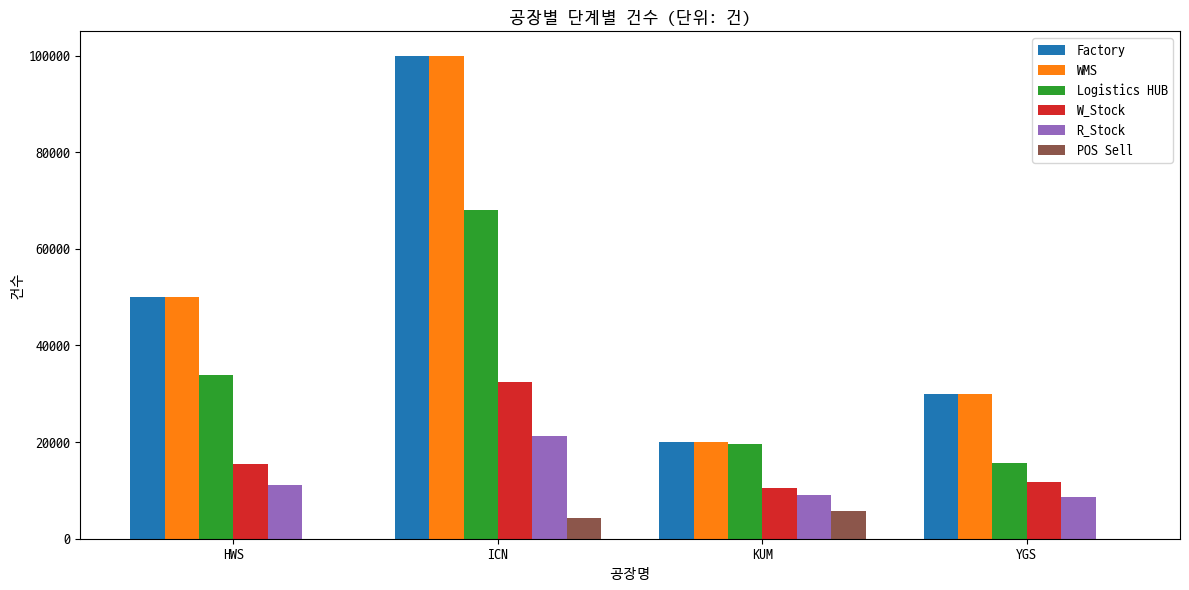

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# D2Coding 폰트 적용
plt.rcParams['font.family'] = 'D2Coding'

# 데이터 준비
factories = ["HWS", "ICN", "KUM", "YGS"]
labels = ["Factory", "WMS", "Logistics HUB", "W_Stock", "R_Stock", "POS Sell"]

data = [
    [50000, 50000, 33900, 15400, 11100, 0],        # HWS
    [100000, 100000, 68000, 32400, 21200, 4200],   # ICN
    [20000, 20000, 19600, 10500, 9000, 5800],      # KUM
    [30000, 30000, 15700, 11700, 8700, 0]          # YGS
]

data = np.array(data)
x = np.arange(len(factories))
bar_width = 0.13

plt.figure(figsize=(12,6))

for i in range(len(labels)):
    plt.bar(x + i*bar_width, data[:,i], width=bar_width, label=labels[i])

plt.xticks(x + bar_width*2.5, factories)
plt.xlabel("공장명")
plt.ylabel("건수")
plt.title("공장별 단계별 건수 (단위: 건)")
plt.legend()
plt.tight_layout()
plt.show()


# 6. 엔티티 구조와 칼럼 매핑 확인

In [ ]:
import pandas as pd
import numpy as np

# 파일 합치기
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# 엔티티 구조 예시(매핑할 컬럼명)
product_fields = ['product_name']
location_fields = ['scan_location', 'location_id']
epc_fields = ['epc_code', 'epc_company', 'epc_product', 'epc_lot', 'epc_manufacture', 'epc_serial']
event_fields = ['hub_type', 'business_step', 'event_type', 'event_time', 'manufacture_date']

results = []
for rep in range(1, 4):
    sample = df.sample(frac=0.3, random_state=rep)
    mismatches = []
    for idx, row in sample.iterrows():
        # Product 매핑 확인
        product_ok = not pd.isna(row['product_name'])

        # Location 매핑 확인
        location_ok = not pd.isna(row['scan_location']) and not pd.isna(row['location_id'])

        # EPC 매핑 확인
        epc_ok = all(not pd.isna(row[field]) for field in epc_fields)

        # EventHistory 매핑 확인
        event_ok = all(not pd.isna(row[field]) for field in event_fields)

        # 전체 매핑 성공?
        if not (product_ok and location_ok and epc_ok and event_ok):
            mismatches.append(idx)

    results.append({
        "반복": rep,
        "샘플개수": len(sample),
        "매핑 성공": len(sample) - len(mismatches),
        "매핑 실패": len(mismatches),
        "실패 인덱스": mismatches
    })

for res in results:
    print(f"\n[반복 {res['반복']}]")
    print(f"샘플 개수: {res['샘플개수']}")
    print(f"매핑 성공: {res['매핑 성공']}")
    print(f"매핑 실패: {res['매핑 실패']}")
    if res["매핑 실패"]:
        print(f"실패 인덱스(행): {res['실패 인덱스']}")

# 이동 경로 저장

In [ ]:
# 3. 이동 정보 저장용 리스트
moves = []

# 4. epc_code별로 그룹핑
for epc, group in df.groupby("epc_code"):
    group = group.reset_index(drop=True)
    for i in range(len(group)-1):
        now = group.loc[i]
        next_ = group.loc[i+1]
        if now["business_step"] != next_["business_step"]:
            move = {
                "from_scan_location": now["scan_location"],
                "to_scan_location": next_["scan_location"],
                "from_location_id": now["location_id"],
                "to_location_id": next_["location_id"],
                "from_business": now["business_step"],
                "to_business": next_["business_step"],
                "from_event_type": now["event_type"],
                "to_event_type": next_["event_type"],
            }
            moves.append(move)

# 5. DataFrame 변환 & 중복 제거
result = pd.DataFrame(moves)
result = result.drop_duplicates(subset=[
    "from_business", "from_location_id", "from_event_type",
    "to_business", "to_location_id", "to_event_type"
])

# 6. 저장
result.to_csv("move_종합.csv", index=False)

# business_step 복제 및 정렬

In [ ]:
import pandas as pd

files = [
    ("ygs.csv", "YGS"),
    ("kum.csv", "KUM"),
    ("hws.csv", "HWS"),
    ("icn.csv", "ICN"),
]

for path, name in files:
    df = pd.read_csv(path, sep="\t")
    # 1. business_step 복제 → business_orginal
    df["business_orginal"] = df["business_step"]
    # 2. 값 치환
    df["business_step"] = df["business_step"].replace({
        "Factory": "Factory",
        "WMS": "WMS",
        "Logistics_HUB": "LogiHub",
        "R_Stock_Inbound": "Reseller",
        "R_Stock_Outbound": "Reseller",
        "W_Stock_Inbound": "Wholesaler",
        "W_Stock_Outbound": "Wholesaler",
        "POS_Sell": "POS"
    })
    # 3. 저장 (덮어쓰기/별도 저장 둘 다 가능, 아래는 덮어쓰기 예시)
    df.to_csv(f"processed_{name}.csv", sep="\t", index=False)

# 파일 통합 및 EPC_Code 및 Event_Time 기준 정렬

In [1]:
import pandas as pd

files = [
    ("processed_YGS.csv", "YGS"),
    ("processed_KUM.csv", "KUM"),
    ("processed_HWS.csv", "HWS"),
    ("processed_ICN.csv", "ICN"),
]

# 1. 4개 파일 통합
df = pd.concat([pd.read_csv(path, sep="\t") for path, _ in files], ignore_index=True)

# 2. epc_code, event_time 기준 정렬
df = df.sort_values(["epc_code", "event_time"])

df.to_csv("정렬", index=False)



# 공장별 epc_lot 고유값 속 Serial 시작 번호 끝번호 / epc코드 개수

In [ ]:
import pandas as pd

files = [
    ("ygs.csv", "YGS"),
    ("kum.csv", "KUM"),
    ("hws.csv", "HWS"),
    ("icn.csv", "ICN"),
]

# 1. 4개 파일 통합 및 공장명 컬럼 추가
dfs = []
for path, factory in files:
    df_part = pd.read_csv(path, sep="\t")
    df_part["factory"] = factory
    dfs.append(df_part)
df = pd.concat(dfs, ignore_index=True)

# 2. event_type == 'Aggregation' 필터링
df_agg = df[df["event_type"] == "Aggregation"].copy()

# (3) epc_lot별 epc_serial의 min, max, count 함수
def get_serial_min_max_count(x):
    str_vals = list(map(str, x))
    lengths = set(map(len, str_vals))
    if len(lengths) == 1:
        return pd.Series({
            'serial_min': min(str_vals),
            'serial_max': max(str_vals),
            'serial_count': len(set(str_vals))
        })
    else:
        ints = list(map(int, str_vals))
        max_len = max(map(len, str_vals))
        return pd.Series({
            'serial_min': str(min(ints)).zfill(max_len),
            'serial_max': str(max(ints)).zfill(max_len),
            'serial_count': len(set(ints))
        })

# 3. 공장(factory)별 집계
for factory in df_agg["factory"].unique():
    print(f"\n===== 🚩 [공장: {factory}] =====")
    sub = df_agg[df_agg["factory"] == factory]


    # (1) epc_lot 고유값 리스트와 개수
    epc_lot_unique_list = sorted(sub["epc_lot"].astype(str).unique())
    epc_lot_unique_count = len(epc_lot_unique_list)
    print(f"1️⃣ epc_lot 고유값 개수: {epc_lot_unique_count}")
    print(f"1️⃣ epc_lot 고유값 예시: {epc_lot_unique_list[:10]}")

     # (2) epc_lot별 고유 epc_code 개수
    epc_lot_epc_code_count = (
        sub.groupby("epc_lot")["epc_code"]
        .nunique()
        .reset_index(name="epc_code_unique_count")
    )
    print("2️⃣ epc_lot별 고유 epc_code 개수 (상위 5개):")
    print(epc_lot_epc_code_count.head())

    # (3) epc_lot별 epc_serial의 min, max, count -- 이 부분을 반드시 for문 안에서!
    epc_lot_serial_stats = (
        sub.groupby("epc_lot")["epc_serial"]
        .apply(get_serial_min_max_count)
        .unstack()
        .reset_index()
    )
    print("3️⃣ epc_lot별 epc_serial의 min, max, count (상위 5개):")
      # 원하는 컬럼 순서대로
    epc_lot_serial_stats = epc_lot_serial_stats[['epc_lot', 'serial_min', 'serial_max', 'serial_count']]
    print(epc_lot_serial_stats.head())
    
    # 필요시 파일로 저장
    epc_lot_epc_code_count.to_csv(f"{factory}_lot별_EPC코드_개수.csv", index=False)
    epc_lot_serial_stats.to_csv(f"{factory}_lot별_serial_시작과_끝번호_stats.csv", index=False)



===== 🚩 [공장: YGS] =====
1️⃣ epc_lot 고유값 개수: 16
1️⃣ epc_lot 고유값 예시: ['100001', '100002', '100003', '100004', '100005', '100006', '100007', '100008', '100009', '100010']
2️⃣ epc_lot별 고유 epc_code 개수 (상위 5개):
   epc_lot  epc_code_unique_count
0   100001                      1
1   100002                   2000
2   100003                   2000
3   100004                   2000
4   100005                   2000
3️⃣ epc_lot별 epc_serial의 min, max, count (상위 5개):
   epc_lot serial_min serial_max serial_count
0   100001          1          1            1
1   100002       0002       2001         2000
2   100003       2002       4001         2000
3   100004       4002       6001         2000
4   100005       6002       8001         2000

===== 🚩 [공장: KUM] =====
1️⃣ epc_lot 고유값 개수: 11
1️⃣ epc_lot 고유값 예시: ['150001', '150002', '150003', '150004', '150005', '150006', '150007', '150008', '150009', '150010']
2️⃣ epc_lot별 고유 epc_code 개수 (상위 5개):
   epc_lot  epc_code_unique_count
0   150001              